In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/data\cloudy\train_10021.jpg
/data\cloudy\train_10043.jpg
/data\cloudy\train_10070.jpg
/data\cloudy\train_10081.jpg
/data\cloudy\train_10096.jpg
/data\cloudy\train_101.jpg
/data\cloudy\train_10128.jpg
/data\cloudy\train_10166.jpg
/data\cloudy\train_10173.jpg
/data\cloudy\train_10177.jpg
/data\cloudy\train_10201.jpg
/data\cloudy\train_10224.jpg
/data\cloudy\train_10225.jpg
/data\cloudy\train_10231.jpg
/data\cloudy\train_10263.jpg
/data\cloudy\train_10265.jpg
/data\cloudy\train_10269.jpg
/data\cloudy\train_10293.jpg
/data\cloudy\train_10326.jpg
/data\cloudy\train_10333.jpg
/data\cloudy\train_10389.jpg
/data\cloudy\train_10406.jpg
/data\cloudy\train_10421.jpg
/data\cloudy\train_10451.jpg
/data\cloudy\train_10485.jpg
/data\cloudy\train_10493.jpg
/data\cloudy\train_10538.jpg
/data\cloudy\train_10540.jpg
/data\cloudy\train_10547.jpg
/data\cloudy\train_10552.jpg
/data\cloudy\train_10555.jpg
/data\cloudy\train_10563.jpg
/data\cloudy\train_10566.jpg
/data\cloudy\train_10581.jpg
/data\cloudy\tra

In [2]:
from pathlib import Path

In [3]:
water = Path('/data/water')
cloudy = Path('/data/cloudy')
desert = Path('/data/desert')
green_area = Path('/data/green_area')

In [4]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    lables = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, lables], axis=1)
    return df

In [5]:
water_df = generate_df(water, label="water")
cloudy_df = generate_df(cloudy, label="cloudy")
desert_df = generate_df(desert, label="desert")
green_area_df = generate_df(green_area, label="green_area")

df = pd.concat([water_df, cloudy_df,desert_df,green_area_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df

,Filepath,Label
0,\data\green_area\Forest_648.jpg,green_area
1,\data\cloudy\train_13167.jpg,cloudy
2,\data\cloudy\train_22967.jpg,cloudy
3,\data\green_area\Forest_2304.jpg,green_area
4,\data\water\SeaLake_2200.jpg,water
...,...,...
5626,\data\water\SeaLake_2925.jpg,water
5627,\data\green_area\Forest_603.jpg,green_area
5628,\data\desert\desert(863).jpg,desert
5629,\data\water\SeaLake_1475.jpg,water


In [6]:
df.head(5)

,Filepath,Label
0,\data\green_area\Forest_648.jpg,green_area
1,\data\cloudy\train_13167.jpg,cloudy
2,\data\cloudy\train_22967.jpg,cloudy
3,\data\green_area\Forest_2304.jpg,green_area
4,\data\water\SeaLake_2200.jpg,water


In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px

import os
from pathlib import Path

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
train_df, test_df = train_test_split(
    df,
    test_size=0.25,
    shuffle=True,
    random_state=42
)

In [10]:
train_df, test_df = train_test_split(
    df,
    test_size=0.25,
    shuffle=True,
    random_state=89
)

In [11]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                      rotation_range=180,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range = 0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)


#### Note:The ImageDataGenerator class allows your model to receive new variations of the images at each epoch

In [11]:
df.shape

(5631, 2)

In [12]:
train_df.shape

(4223, 2)

In [13]:
test_df.shape

(1408, 2)

In [14]:
#train_generator, validation_generator = train_val_generators(training, validation)

In [12]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(227, 227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=96,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(227, 227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=96,
    subset='validation'
)

test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(227, 227),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=96,
)

Found 4223 validated image filenames belonging to 4 classes.
Found 0 validated image filenames belonging to 4 classes.
Found 1408 validated image filenames belonging to 4 classes.


In [13]:
x_train = []
y_train = []

c = 0
for feature, label in train_data:
    x_train.append(np.array(feature))
    y_train.append(np.array(label))
    c += 1
    if c == 1:
        break

x_train = np.array(x_train)
print(x_train.shape)
x_train = np.reshape(x_train, ( 64, 227, 227, 3))
print(x_train.shape)

(1, 64, 227, 227, 3)
(64, 227, 227, 3)


In [14]:
y_train

[array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0.,

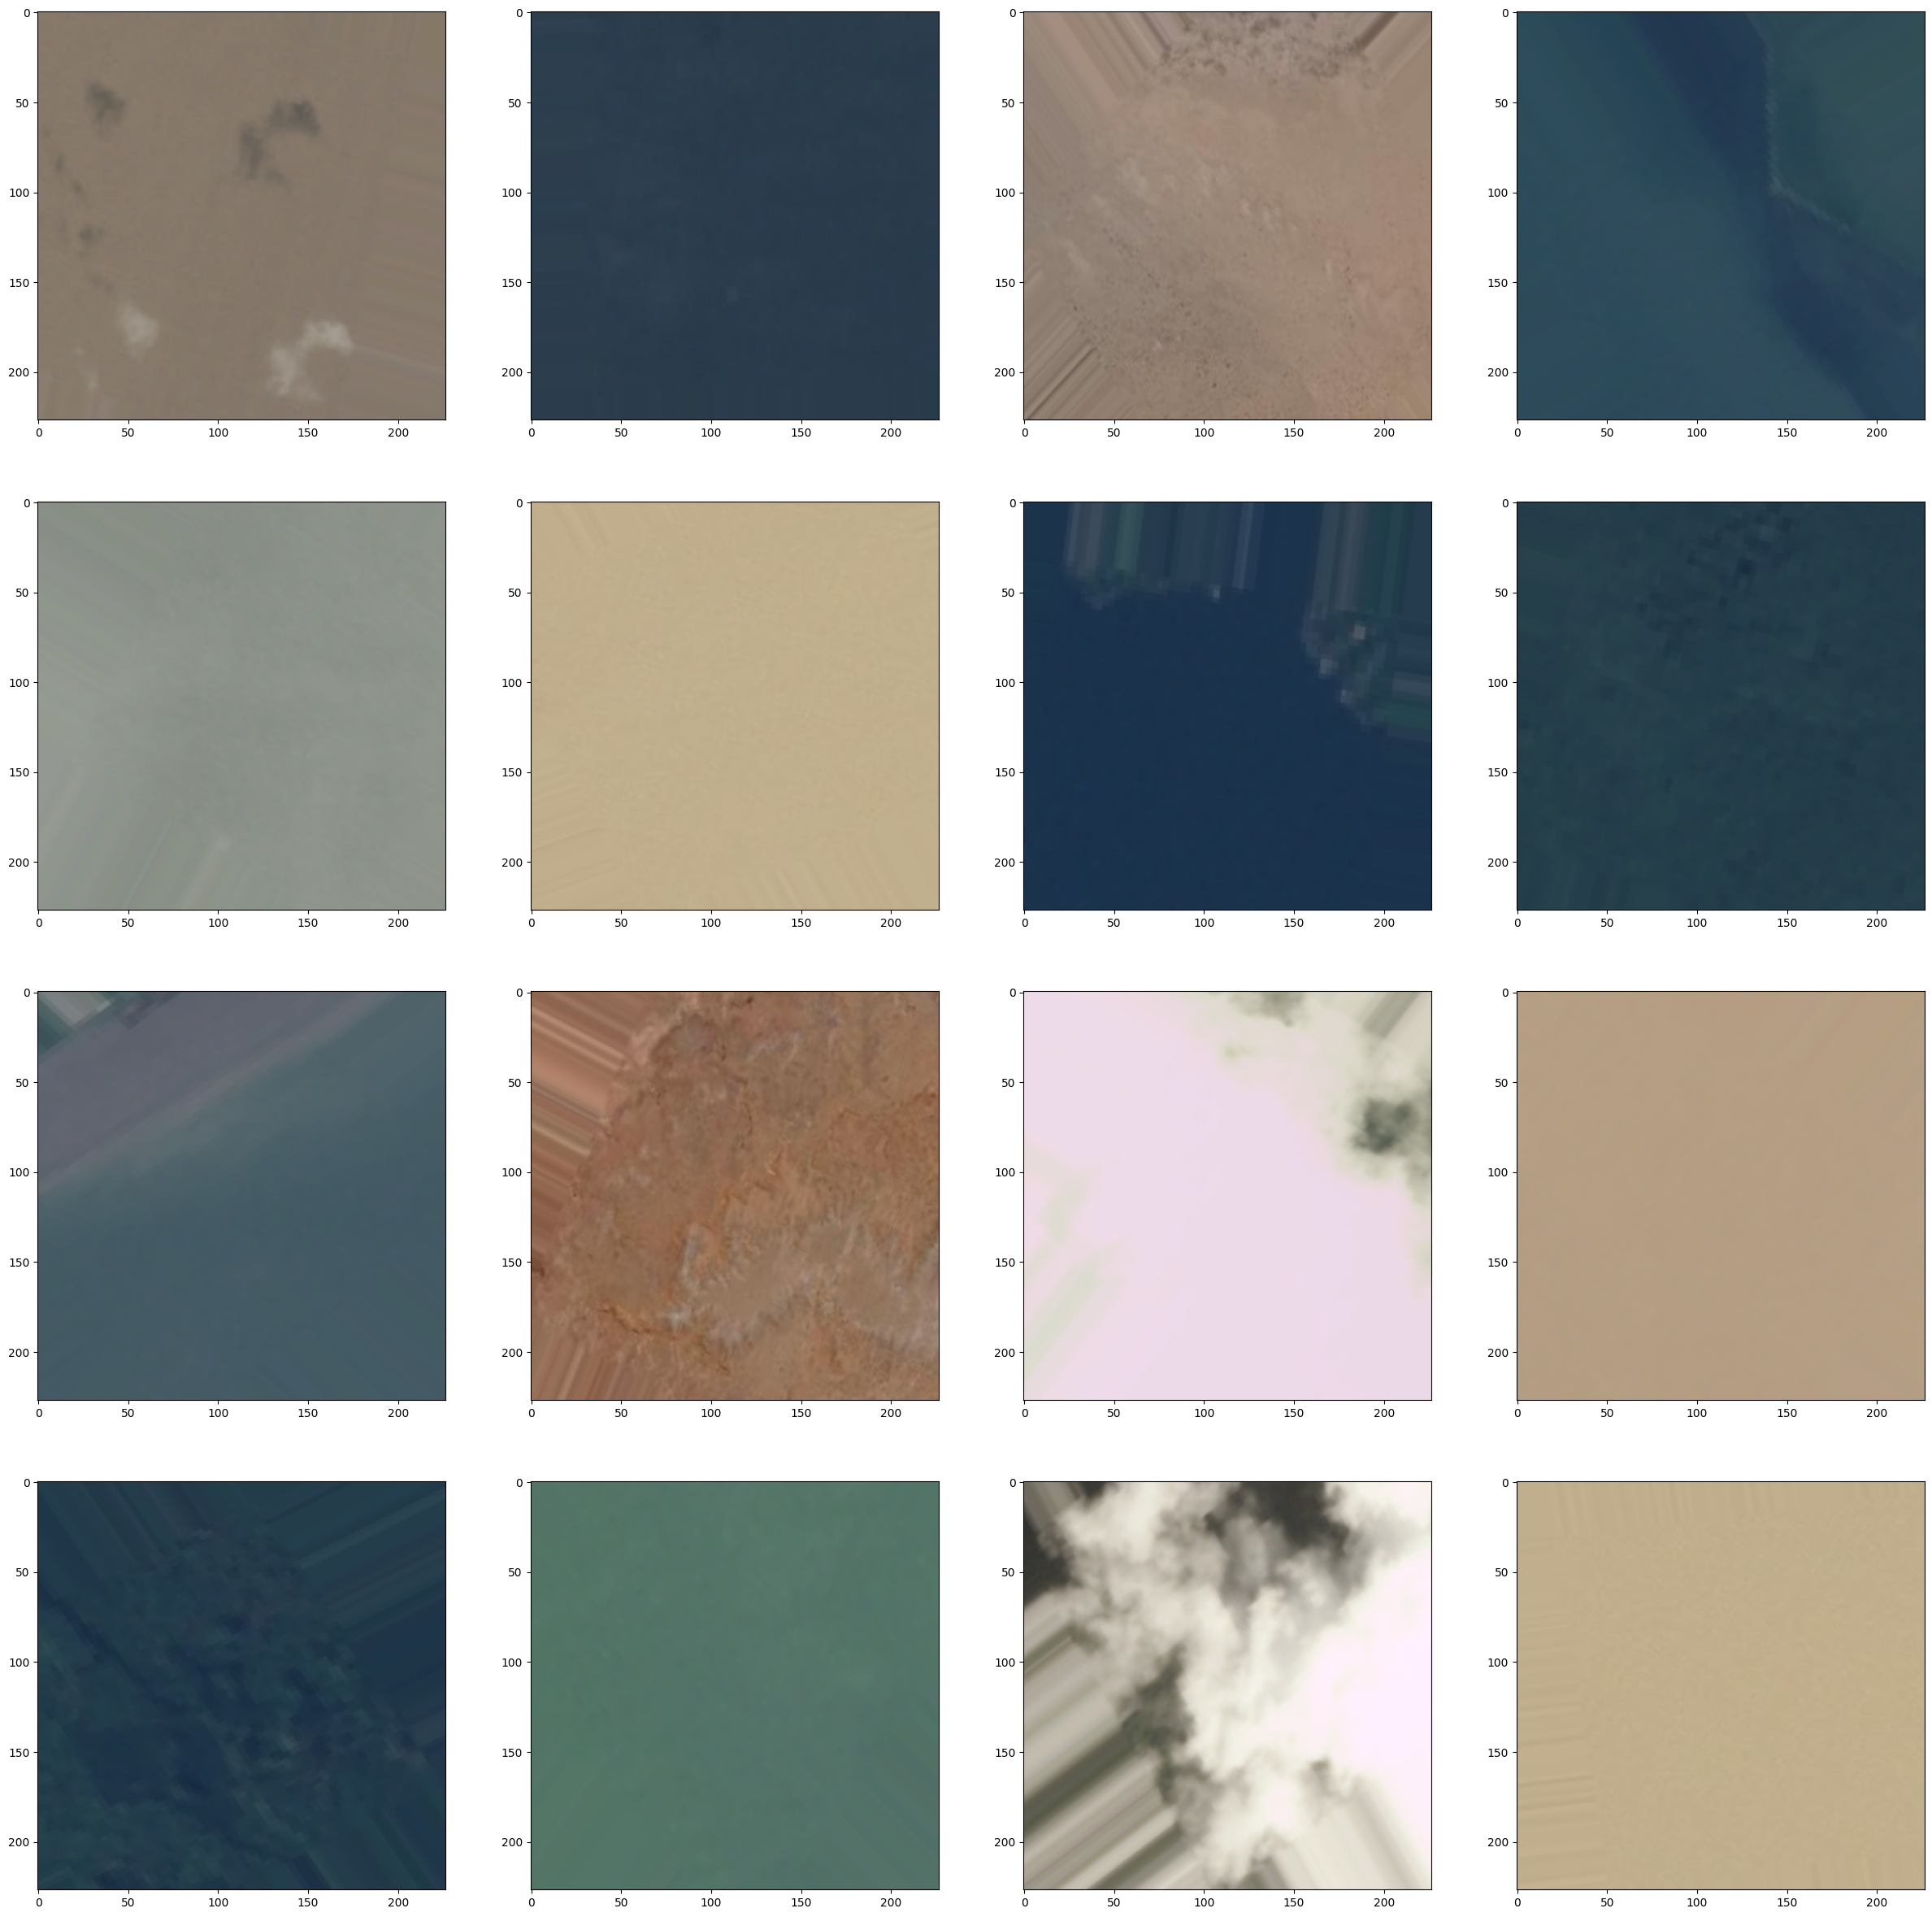

In [15]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for i in range(0, 16):
    ax[int(i / 4), (i % 4)].imshow(x_train[i])


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
layers.Dense(4, activation='softmax')

In [17]:
"""model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen, epochs=10, verbose=1,
                    validation_data=(test_gen))"""

"model.compile(optimizer='adam',\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy'])\n\nhistory = model.fit(train_gen, epochs=10, verbose=1,\n                    validation_data=(test_gen))"

In [18]:
"""plt.subplot()
plt.imshow(train_df.iloc[0:0], cmap=plt.get_cmap('gray'))"""

"plt.subplot()\nplt.imshow(train_df.iloc[0:0], cmap=plt.get_cmap('gray'))"

In [19]:
"""class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()"""

"class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',\n               'dog', 'frog', 'horse', 'ship', 'truck']\n\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(train_images[i])\n    # The CIFAR labels happen to be arrays, \n    # which is why you need the extra index\n    plt.xlabel(class_names[train_labels[i][0]])\nplt.show()"

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
import shutil
root_dir = '/new'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.mkdir(root_path)
    training = os.path.join(root_path, 'training/')
    validation = os.path.join(root_path, 'validation/')

    train_cloudy = os.path.join(training, 'cloudy')
    train_desert = os.path.join(training, 'desert')
    train_green_area = os.path.join(training, 'green_area')
    train_water = os.path.join(training, 'water')

    valid_cloudy = os.path.join(validation, 'cloudy')
    valid_desert = os.path.join(validation, 'desert')
    valid_green_area = os.path.join(validation, 'green_area')
    valid_water = os.path.join(validation, 'water')

    os.mkdir(training)
    os.mkdir(validation)
    
    os.mkdir(train_cloudy)
    os.mkdir(train_desert)
    os.mkdir(train_green_area)
    os.mkdir(train_water)
    
    os.mkdir(valid_cloudy)
    os.mkdir(valid_desert)
    os.mkdir(valid_green_area)
    os.mkdir(valid_water)

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print(FileExistsError)

In [23]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/new\training
/new\validation
/new\training\cloudy
/new\training\desert
/new\training\green_area
/new\training\water
/new\validation\cloudy
/new\validation\desert
/new\validation\green_area
/new\validation\water


In [24]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    source_files = os.listdir(SOURCE_DIR)
    source_files_to_copy_train = random.sample(source_files, int(len(source_files) * SPLIT_SIZE))
    for file in source_files_to_copy_train:
        if os.path.getsize(os.path.join(SOURCE_DIR,file)) > 0:
            shutil.copy(SOURCE_DIR+file, TRAINING_DIR+file)
        else:
            print(f'{file} is zero length, so ignoring.')
    for file in source_files:
        if file not in source_files_to_copy_train:
            if os.path.getsize(os.path.join(SOURCE_DIR,file)) > 0:
                shutil.copy(SOURCE_DIR+file, VALIDATION_DIR+file)
            else:
                print(f'{file} is zero length, so ignoring.')

In [25]:
training = "/new/training/"
validation = "/new/validation/"

CLOUDY_SOURCE_DIR = '/data/cloudy/'
DESERT_SOURCE_DIR = '/data/desert/'
GREEN_AREA_SOURCE_DIR = '/data/green_area/'
WATER_SOURCE_DIR = '/data/water/'

TRAINING_CLOUDY_DIR = os.path.join(training, "cloudy/")
VALIDATION_CLOUDY_DIR = os.path.join(validation, "cloudy/")

TRAINING_DESERT_DIR = os.path.join(training, 'desert/')
VALIDATION_DESERT_DIR = os.path.join(validation, 'desert/')

TRAINING_GREEN_AREA_DIR = os.path.join(training, 'green_area/')
VALIDATION_GREEN_AREA_DIR = os.path.join(validation, 'green_area/')

TRAINING_WATER_DIR = os.path.join(training, 'water/')
VALIDATION_WATER_DIR = os.path.join(validation, 'water/')

In [26]:
import random
import shutil
split_size = 0.75
split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALIDATION_CLOUDY_DIR, split_size)
split_data(DESERT_SOURCE_DIR, TRAINING_DESERT_DIR, VALIDATION_DESERT_DIR, split_size)
split_data(GREEN_AREA_SOURCE_DIR, TRAINING_GREEN_AREA_DIR, VALIDATION_GREEN_AREA_DIR, split_size)
split_data(WATER_SOURCE_DIR, TRAINING_WATER_DIR, VALIDATION_WATER_DIR, split_size)

In [27]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                      rotation_range=180,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range = 0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
    return train_generator, validation_generator

In [28]:
train_generator, validation_generator = train_val_generators(training, validation)

Found 4223 images belonging to 4 classes.
Found 1408 images belonging to 4 classes.


In [29]:
from keras import layers,models

In [30]:
model = models.Sequential([
      layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 3)),
      layers.MaxPooling2D(4,4),
      layers.Conv2D(64, (4,4), activation='relu'),
      layers.MaxPooling2D(4,4),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      layers.Flatten(),
      # 512 neuron hidden layer
        layers.Dropout(0.1),
      layers.Dense(512, activation='relu'),
        layers.Dropout(0.1),
      layers.Dense(4, activation='softmax')
    ])

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
history = model.fit(train_generator, epochs=10, verbose=1,
                    validation_data=(validation_generator))

Epoch 1/10
132/132 [==============================] - 138s 1s/step - loss: 0.7017 - accuracy: 0.6135 - val_loss: 0.5217 - val_accuracy: 0.6619
Epoch 2/10
132/132 [==============================] - 68s 511ms/step - loss: 0.5112 - accuracy: 0.7265 - val_loss: 0.4618 - val_accuracy: 0.8338
Epoch 3/10
132/132 [==============================] - 65s 493ms/step - loss: 0.4560 - accuracy: 0.7923 - val_loss: 0.6064 - val_accuracy: 0.7294
Epoch 4/10
132/132 [==============================] - 77s 585ms/step - loss: 0.4474 - accuracy: 0.7956 - val_loss: 0.3931 - val_accuracy: 0.8239
Epoch 5/10
132/132 [==============================] - 70s 526ms/step - loss: 0.3979 - accuracy: 0.8300 - val_loss: 0.3842 - val_accuracy: 0.8366
Epoch 6/10
132/132 [==============================] - 77s 583ms/step - loss: 0.3995 - accuracy: 0.8264 - val_loss: 0.3739 - val_accuracy: 0.8345
Epoch 7/10
132/132 [==============================] - 82s 624ms/step - loss: 0.3938 - accuracy: 0.8331 - val_loss: 0.4268 - val_accu

In [32]:
Model_trial = pd.DataFrame(model.history.history)
Model_trial.head()

,loss,accuracy,val_loss,val_accuracy
0,0.701686,0.613545,0.521739,0.661932
1,0.511173,0.726498,0.461827,0.833807
2,0.456005,0.792328,0.606448,0.729403
3,0.447352,0.795643,0.393134,0.823864
4,0.397852,0.829979,0.384183,0.836648


<Axes: >

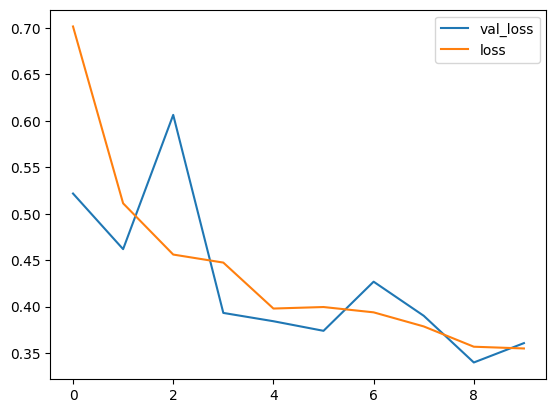

In [33]:
Model_trial[["val_loss","loss"]].plot()

<Axes: >

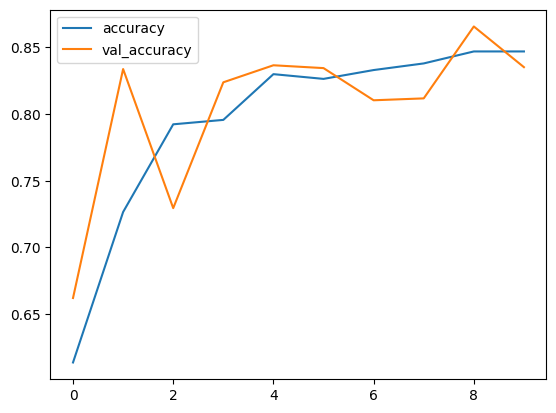

In [34]:
Model_trial[["accuracy","val_accuracy"]].plot()


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 64)        